In [211]:
#Importar librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [212]:
df = pd.read_csv("BASE.csv", header = 0, parse_dates = [0], index_col = 0, dayfirst=True)
df = df.iloc[:,:4]
df['Año'] = pd. DatetimeIndex(df.index).year
df['Mes'] = pd. DatetimeIndex(df.index).month
df

,Hora,Tipo Dia,Ciudad Buenos Aires,Clima Ciudad Buenos Aires,Año,Mes
Fecha,,,,,,
2018-01-01 00:00:00,0,1,1544.873,19.2,2018,1
2018-01-01 01:00:00,1,1,1425.868,18.6,2018,1
2018-01-01 02:00:00,2,1,1387.791,18.5,2018,1
2018-01-01 03:00:00,3,1,1327.708,17.9,2018,1
2018-01-01 04:00:00,4,1,1268.554,17.5,2018,1
...,...,...,...,...,...,...
2021-07-31 19:00:00,19,7,1993.628,11.6,2021,7
2021-07-31 20:00:00,20,7,2179.763,9.9,2021,7
2021-07-31 21:00:00,21,7,2185.000,9.0,2021,7


In [213]:
df.describe()

,Hora,Tipo Dia,Ciudad Buenos Aires,Clima Ciudad Buenos Aires,Año,Mes
count,31392.000000,31392.000000,31392.000000,31291.000000,31392.000000,31392.000000
mean,11.500000,3.902905,1711.380114,18.515474,2019.324924,6.116208
std,6.922297,2.068559,239.908452,6.414347,1.049593,3.386745
min,0.000000,1.000000,35.574000,0.000000,2018.000000,1.000000
25%,5.750000,2.000000,1542.132500,13.700000,2018.000000,3.000000
50%,11.500000,4.000000,1702.990000,18.600000,2019.000000,6.000000
75%,17.250000,6.000000,1868.775000,23.200000,2020.000000,9.000000
max,23.000000,7.000000,2591.461000,37.800000,2021.000000,12.000000


In [ ]:
#Graficos de boxplot
for column in df.columns[2:]:
    plt.figure()
    sns.boxplot(data=df[column], palette="Set2").set_title(column)

In [214]:
#Calculo del rango intercuartil
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Hora                          11.5000
Tipo Dia                       4.0000
Ciudad Buenos Aires          326.6425
Clima Ciudad Buenos Aires      9.5000
Año                            2.0000
Mes                            6.0000
dtype: float64


In [215]:
#Reemplazar outliers con NaN utilizando el IQR

df = df.mask((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)), np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31392 entries, 2018-01-01 00:00:00 to 2021-07-31 23:00:00
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hora                       31392 non-null  int64  
 1   Tipo Dia                   31392 non-null  int64  
 2   Ciudad Buenos Aires        31200 non-null  float64
 3   Clima Ciudad Buenos Aires  31289 non-null  float64
 4   Año                        31392 non-null  int64  
 5   Mes                        31392 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.7 MB


In [216]:
#Interpolar linealmente los valores NaN
df = df.interpolate(method="linear", limit_direction ='forward')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31392 entries, 2018-01-01 00:00:00 to 2021-07-31 23:00:00
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hora                       31392 non-null  int64  
 1   Tipo Dia                   31392 non-null  int64  
 2   Ciudad Buenos Aires        31392 non-null  float64
 3   Clima Ciudad Buenos Aires  31392 non-null  float64
 4   Año                        31392 non-null  int64  
 5   Mes                        31392 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.7 MB


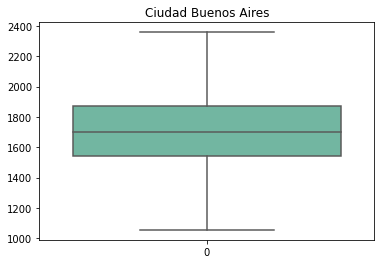

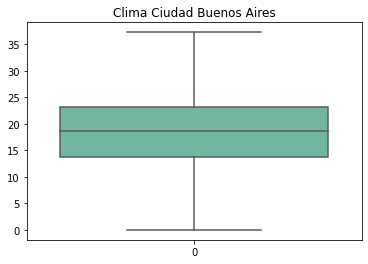

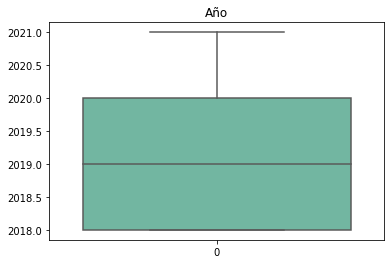

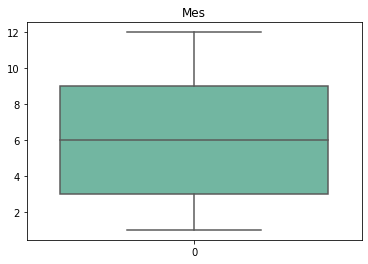

In [217]:
#Graficos de boxplot para comprobar que removi los outliers
for column in df.columns[2:]:
    plt.figure()
    sns.boxplot(data=df[column], palette="Set2").set_title(column)

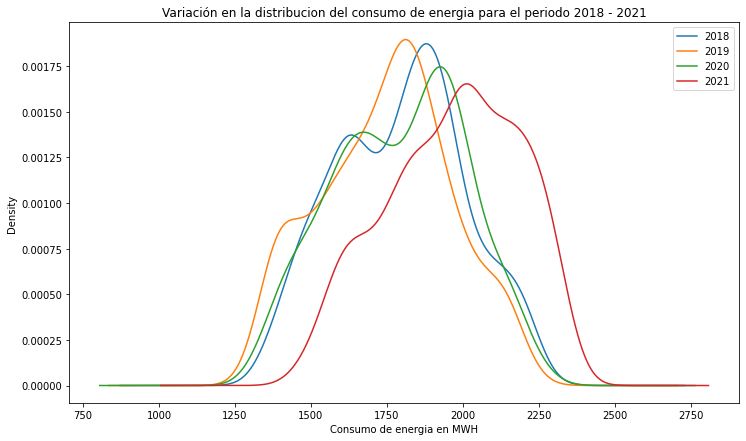

In [241]:

df1 = df.loc[(df['Mes'] < 8) & (df['Mes'] > 6) ]
for año in df1['Año'].unique():
    df1[df1['Año'] == año]['Ciudad Buenos Aires'].plot(kind='density', figsize = (12,7), legend = True, label = año)
    _ = plt.xlabel('Consumo de energia en MWH')
    _ = plt.title('Variación en la distribucion del consumo de energia para el periodo 2018 - 2021')

In [ ]:
#Exportar csv sin outliers
df.to_csv("BASEo.csv")